In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
#Debido a que este es un conjunto de datos grande, usaremos RandomizedPCA— contiene un método aleatorio para aproximar el primernortecomponentes principales mucho más rápido que el PCAestimador estándar y, por lo tanto, es muy útil para datos de alta dimensión (aquí, una dimensionalidad de casi 3000). Echaremos un vistazo a los primeros 150 componentes

In [8]:
from sklearn.decomposition import PCA as RandomizedPCA
import numpy as np
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

In [ ]:
#En este caso, puede ser interesante visualizar las imágenes asociadas con los primeros componentes principales (estos componentes se conocen técnicamente como "vectores propios", por lo que este tipo de imágenes a menudo se denominan "caras propias")

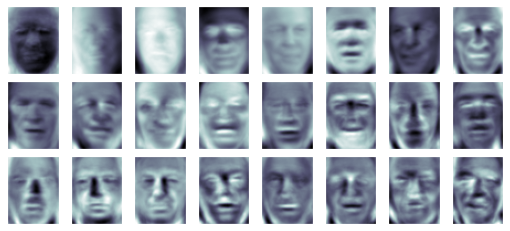

In [9]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

In [ ]:
#Los resultados son muy interesantes y nos dan una idea de cómo varían las imágenes: por ejemplo, las primeras caras propias (desde la parte superior izquierda) parecen estar asociadas con el ángulo de iluminación en la cara, y los vectores principales posteriores parecen estar eligiendo ciertos rasgos, como ojos, narices y labios

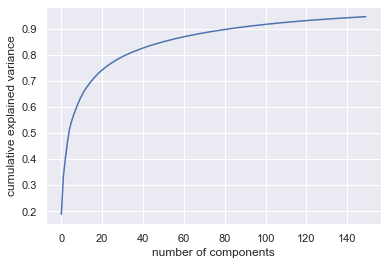

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
#Vemos que estos 150 componentes explican poco más del 90% de la varianza. Eso nos llevaría a creer que utilizando estos 150 componentes recuperaríamos la mayor parte de las características esenciales de los datos. Para hacer esto más concreto, podemos comparar las imágenes de entrada con las imágenes reconstruidas a partir de estos 150 componentes

In [11]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

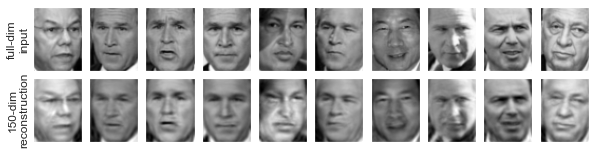

In [12]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

In [ ]:
#La fila superior aquí muestra las imágenes de entrada, mientras que la fila inferior muestra la reconstrucción de las imágenes de solo 150 de las ~3000 características iniciales

In [ ]:
#CONCLUSION :  Lo que esto significa es que nuestro algoritmo de clasificación debe entrenarse con datos de 150 dimensiones en lugar de datos de 3000 dimensiones, lo que, según el algoritmo particular que elijamos, puede conducir a una clasificación mucho más eficiente.